In [20]:
import numpy as np
import matplotlib.pyplot as plt

from skbeam.core.accumulators.droplet import dropletfind, dropletanal
#from droplet import photonize

%matplotlib inline

In [21]:
def hit(img, xcen, ycen, adu, sigma):
    ''' hit an image with a Gaussian photon of ADU and sigma.'''
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    X,Y = np.meshgrid(x,y)
    C = adu/(2*np.pi*sigma**2)
    img += C*np.exp(-((X-xcen)**2 + (Y-ycen)**2)/(2.*sigma**2))

In [22]:
# hit detector with Nphots photons with avg ADU 800 electrons and stdev of 15 ADU
Nphots = 600
adu0 = 800
sigma_adu = 15
sigma_charge = 2 #(in pixels)
img = np.zeros((1000,1000))
Nx = img.shape[1]
Ny = img.shape[0]
for i in range(Nphots):
    xcen = (np.random.random(1)[0]-.5)*(Nx-10*sigma_charge) + Nx/2
    ycen = (np.random.random(1)[0]-.5)*(Ny-10*sigma_charge) + Ny/2
    adu = np.random.normal(loc=adu0,scale=sigma_adu)
    hit(img, xcen, ycen, adu, sigma_charge)

#img = (np.random.random((100,100))*100).astype(int)

In [5]:
# typical thresholding at an xray beamline
#img = (img > adu0/2.)*img
# digitize into adu
img = ((img > 0)*img).astype(int)

#make binary image for the droplet analysis
bimg = (img > 0).astype(int)

In [6]:
# the droplet analysis
npeaks, dimg = dropletfind(bimg)
npix, xcen, ycen, adus, idlist = dropletanal(img, dimg, npeaks)

# histogram the ADUS
hcnts = np.bincount(adus)

In [14]:
npix.shape, xcen.shape, ycen.shape, adus

((540,),
 (540,),
 (540,),
 array([ 727,  725,  744,  724,  732,  733,  739,  723,  746,  740,  746,
         735,  711,  735,  729, 3018,  757,  735,  740,  751,  745,  724,
         746,  773,  743,  738,  728,  710,  749, 1464,  716,  727, 1457,
         754,  746,  712,  718,  740,  735,  727,  724,  740,  710,  729,
        1487,  717,  729,  750,  745,  719,  760,  749,  762,  731,  733,
         758,  740,  744,  721,  760,  732,  728,  726,  732,  729,  745,
         727,  737,  719,  744,  726,  753, 1471,  721,  752,  734,  745,
         746,  750,  746, 1496,  747,  760,  748,  742,  738,  732,  719,
         720,  725,  734, 1511,  731,  713,  719,  735,  739,  738,  754,
         724,  729,  736,  752,  728,  727,  713,  761,  747,  736,  746,
         727,  738,  752,  738,  740,  710,  737, 1496,  713,  697,  730,
         746,  739,  729,  737,  730,  742,  716,  741,  711,  740,  752,
         747, 2212,  727, 1462,  740,  749,  737,  723,  743,  724,  740,
         72

In [16]:
hcnts

array([0, 0, 0, ..., 0, 0, 1])

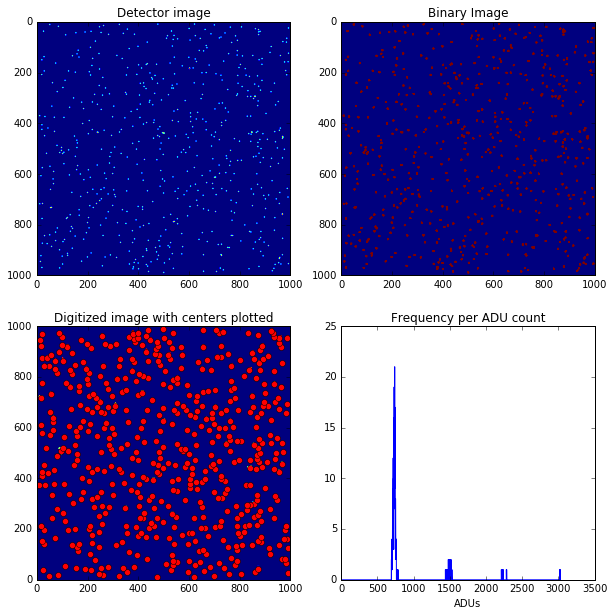

In [18]:
# plotting

plt.figure(figsize=(10,10));plt.clf();

plt.subplot(2,2,1);
plt.imshow(img)
plt.title("Detector image")

plt.subplot(2,2,2);
plt.imshow(bimg);
plt.title("Binary Image")

plt.subplot(2,2,3);
plt.title("Digitized image with centers plotted")
plt.imshow(dimg);
plt.plot(xcen,ycen,'ro');
plt.xlim(-.5,dimg.shape[1]+.5)
plt.ylim(-.5,dimg.shape[0]+.5)

plt.subplot(2,2,4);
plt.plot(hcnts);
plt.xlabel("ADUs")
plt.title("Frequency per ADU count")
plt.show()

In [24]:
img = np.load("LBCO_image.npy")

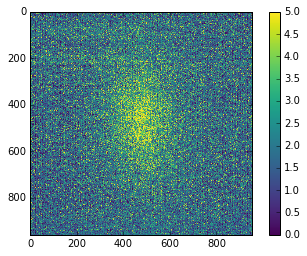

In [26]:
plt.figure()
plt.imshow(img, vmin=0, vmax=5, cmap="viridis")
plt.colorbar()

In [27]:
# typical thresholding at an xray beamline #img = (img > adu0/2.)*img
         # digitize into adu
img = ((img > 5)*img).astype(int)
#make binary image for the droplet analysis
bimg = (img > 5).astype(int)

In [28]:
# the droplet analysis
npeaks, dimg = dropletfind(bimg)
npix, xcen, ycen, adus, idlist = dropletanal(img, dimg, npeaks) # histogram the ADUS
hcnts = np.bincount(adus)

In [30]:
hcnts.shape

(203,)

In [33]:
adus

array([6, 7, 6, ..., 7, 6, 6])

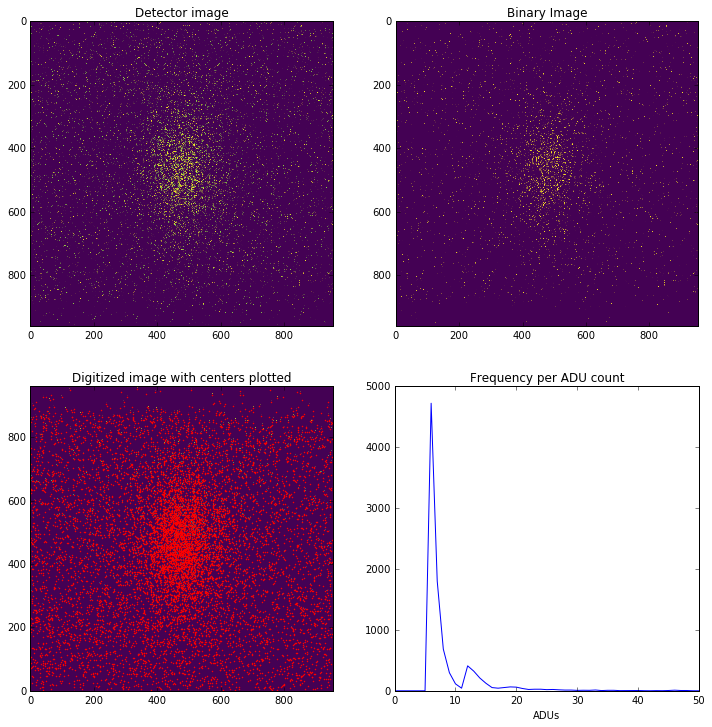

In [38]:
plt.figure(0, figsize=(12,12));
plt.clf();

plt.subplot(2,2,1);
plt.imshow(img, vmax=6, cmap="viridis")
plt.title("Detector image")

plt.subplot(2,2,2);
plt.imshow(bimg, vmax=1, cmap="viridis");
plt.title("Binary Image")

plt.subplot(2,2,3);
plt.title("Digitized image with centers plotted")
plt.imshow(dimg, cmap="viridis");
plt.plot(xcen,ycen,"ro", mec="r", ms=1)
plt.xlim(-.5,dimg.shape[1]+.5)
plt.ylim(-.5,dimg.shape[0]+.5)

plt.subplot(2,2,4);
plt.plot(hcnts);
plt.xlabel("ADUs")
plt.xlim(0,50)
plt.title("Frequency per ADU count")
plt.show()